In [47]:
#volatility analysis 

In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("cleaned.csv")
df

,Ticker,close,high,low,month,open,volume,Date,Time
0,SBIN,602.95,604.9,589.60,2023-10,596.60,15322196,2023-10-03,05:30:00
1,BAJFINANCE,7967.60,7975.5,7755.00,2023-10,7780.80,944555,2023-10-03,05:30:00
2,TITAN,3196.25,3212.5,3114.40,2023-10,3148.80,1007308,2023-10-03,05:30:00
3,ITC,439.75,442.9,439.25,2023-10,441.00,7481883,2023-10-03,05:30:00
4,TCS,3513.85,3534.2,3480.10,2023-10,3534.20,1948148,2023-10-03,05:30:00
...,...,...,...,...,...,...,...,...,...
14195,HINDALCO,652.10,657.3,647.40,2024-11,652.95,3586402,2024-11-22,05:30:00
14196,HEROMOTOCO,4794.10,4808.4,4742.00,2024-11,4778.40,394712,2024-11-22,05:30:00
14197,AXISBANK,1142.40,1147.9,1127.55,2024-11,1136.65,16687505,2024-11-22,05:30:00
14198,HDFCBANK,1745.60,1754.3,1729.55,2024-11,1743.55,12386806,2024-11-22,05:30:00


In [50]:
#daily returns
df["daily returns"] = df.groupby("Ticker")["close"].pct_change()


In [51]:
df

,Ticker,close,high,low,month,open,volume,Date,Time,daily returns
0,SBIN,602.95,604.9,589.60,2023-10,596.60,15322196,2023-10-03,05:30:00,NaN
1,BAJFINANCE,7967.60,7975.5,7755.00,2023-10,7780.80,944555,2023-10-03,05:30:00,NaN
2,TITAN,3196.25,3212.5,3114.40,2023-10,3148.80,1007308,2023-10-03,05:30:00,NaN
3,ITC,439.75,442.9,439.25,2023-10,441.00,7481883,2023-10-03,05:30:00,NaN
4,TCS,3513.85,3534.2,3480.10,2023-10,3534.20,1948148,2023-10-03,05:30:00,NaN
...,...,...,...,...,...,...,...,...,...,...
14195,HINDALCO,652.10,657.3,647.40,2024-11,652.95,3586402,2024-11-22,05:30:00,0.006250
14196,HEROMOTOCO,4794.10,4808.4,4742.00,2024-11,4778.40,394712,2024-11-22,05:30:00,0.005506
14197,AXISBANK,1142.40,1147.9,1127.55,2024-11,1136.65,16687505,2024-11-22,05:30:00,0.002853
14198,HDFCBANK,1745.60,1754.3,1729.55,2024-11,1743.55,12386806,2024-11-22,05:30:00,0.002527


In [52]:
df["daily returns"] = df["daily returns"].fillna(0)

In [53]:
df

,Ticker,close,high,low,month,open,volume,Date,Time,daily returns
0,SBIN,602.95,604.9,589.60,2023-10,596.60,15322196,2023-10-03,05:30:00,0.000000
1,BAJFINANCE,7967.60,7975.5,7755.00,2023-10,7780.80,944555,2023-10-03,05:30:00,0.000000
2,TITAN,3196.25,3212.5,3114.40,2023-10,3148.80,1007308,2023-10-03,05:30:00,0.000000
3,ITC,439.75,442.9,439.25,2023-10,441.00,7481883,2023-10-03,05:30:00,0.000000
4,TCS,3513.85,3534.2,3480.10,2023-10,3534.20,1948148,2023-10-03,05:30:00,0.000000
...,...,...,...,...,...,...,...,...,...,...
14195,HINDALCO,652.10,657.3,647.40,2024-11,652.95,3586402,2024-11-22,05:30:00,0.006250
14196,HEROMOTOCO,4794.10,4808.4,4742.00,2024-11,4778.40,394712,2024-11-22,05:30:00,0.005506
14197,AXISBANK,1142.40,1147.9,1127.55,2024-11,1136.65,16687505,2024-11-22,05:30:00,0.002853
14198,HDFCBANK,1745.60,1754.3,1729.55,2024-11,1743.55,12386806,2024-11-22,05:30:00,0.002527


In [54]:
df_volatility = df.groupby("Ticker")["daily returns"].std().reset_index()
df_volatility.rename(columns={"daily returns" : "volatility"},inplace=True)

In [55]:
df_volatility = df_volatility.sort_values(by="volatility",ascending=False).head(10)
df_volatility

,Ticker,volatility
0,ADANIENT,0.028550
1,ADANIPORTS,0.025983
8,BEL,0.023243
47,TRENT,0.023034
34,ONGC,0.022208
10,BPCL,0.022030
39,SHRIRAMFIN,0.021649
13,COALINDIA,0.021374
21,HINDALCO,0.019552
33,NTPC,0.019441


In [56]:
import matplotlib.pyplot as plt


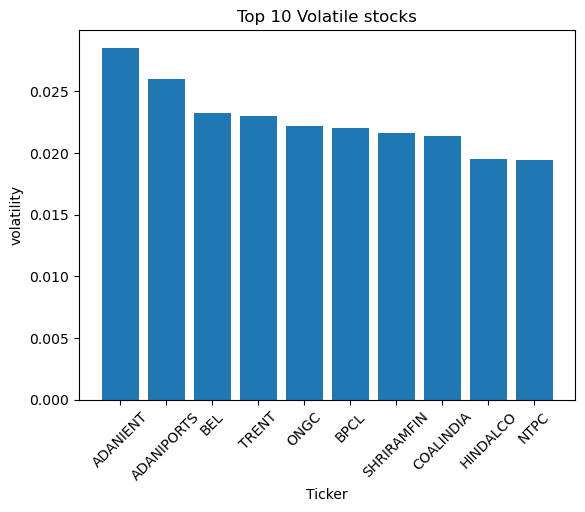

In [57]:
plt.Figure(figsize=(15,10))
plt.bar(df_volatility["Ticker"],df_volatility["volatility"])
plt.title("Top 10 Volatile stocks")
plt.xlabel("Ticker")
plt.ylabel("volatility")
plt.xticks(rotation = 45)
plt.show()

In [58]:
#Cumulative Return Over Time

In [59]:
df["cumulative return"] = (1+df["daily returns"]).groupby(df["Ticker"]).cumprod()-1

In [ ]:
df_cumulative = df.groupby("Ticker")["cumulative return"].last()
cumulative_return = df_cumulative.sort_values(ascending=False).head(5)

In [61]:
import pprint
pprint.pprint(cumulative_return)

Ticker
TRENT         2.230926
BEL           1.017601
M&M           0.959770
BAJAJ-AUTO    0.890112
BHARTIARTL    0.695990
Name: cumulative return, dtype: float64


In [75]:
df["Date"] = pd.to_datetime(df["Date"])

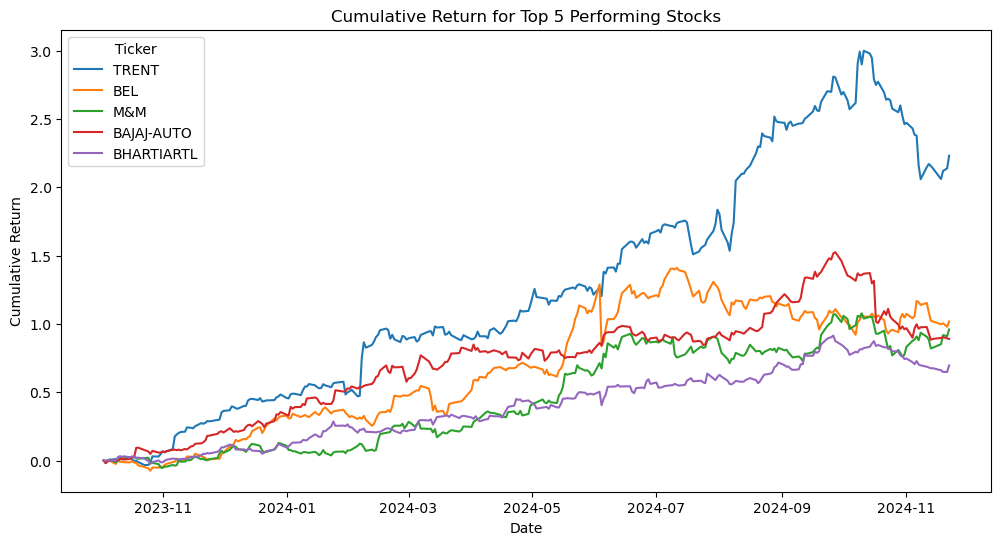

In [78]:
plt.figure(figsize=(12, 6))

for ticker in cumulative_return.index:  # use the index since cumulative_return is a Series
    data = df[df["Ticker"] == ticker]
    plt.plot(data["Date"], data["cumulative return"], label=ticker)

plt.title('Cumulative Return for Top 5 Performing Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(title="Ticker")
plt.show()